In [30]:
import os

def get_latency_distribution_paths(directory):
    paths = []
    for fname in os.listdir(directory):
        if fname == 'runs.csv':
            continue
        path = os.path.join(directory, fname)
        paths.append(path)
    return paths
        
print get_latency_distribution_paths('/mnt/sun-pcp01/subhasis/timing_analysis/19.07/')
print get_latency_distribution_paths('/mnt/sun-pcp01/subhasis/timing_analysis/19.05/')

['/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T210344-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T194324-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T175937-kitt_06.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T183903-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T214054-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T173027-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.07/20190225T211006-kitt_06.csv']
['/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190209T170513-kitt_10.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190219T191155-kitt_08.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190212T225320-kitt_03.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190222T191735-kitt_05.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190224T193507-kitt_04.csv', '/mnt/sun-pcp01/subhasis/timing_analysis/19.05/20190220T193220-kitt_05.csv

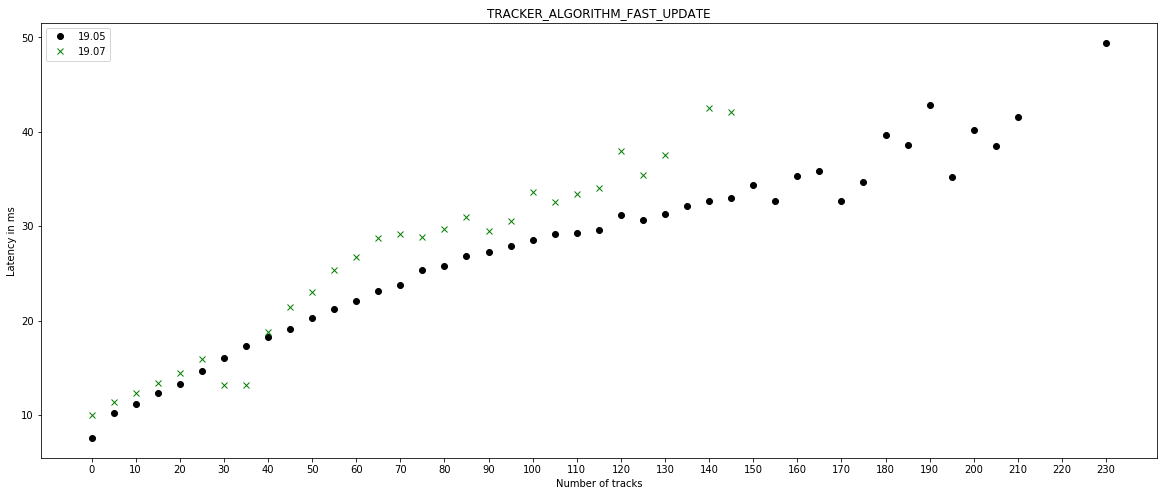

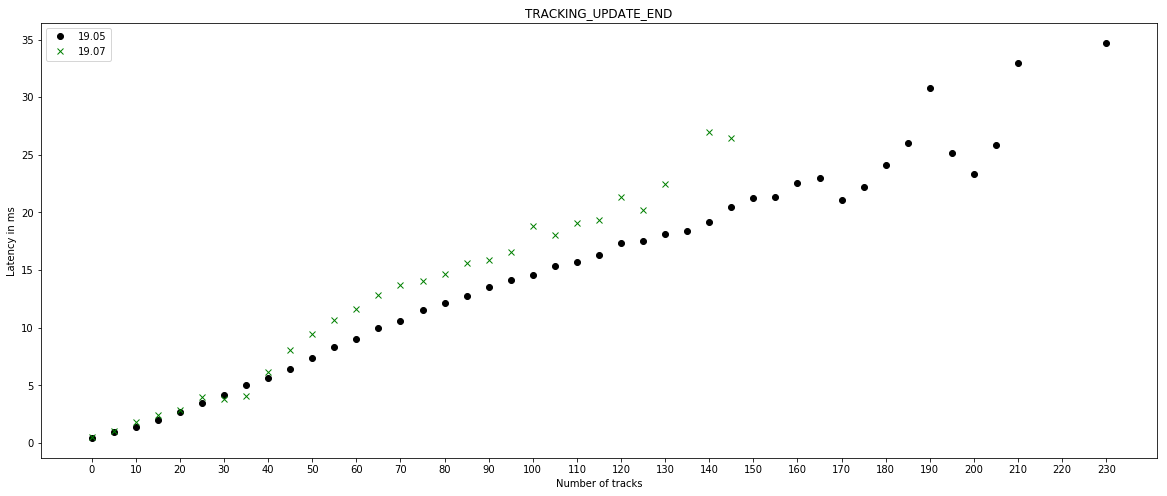

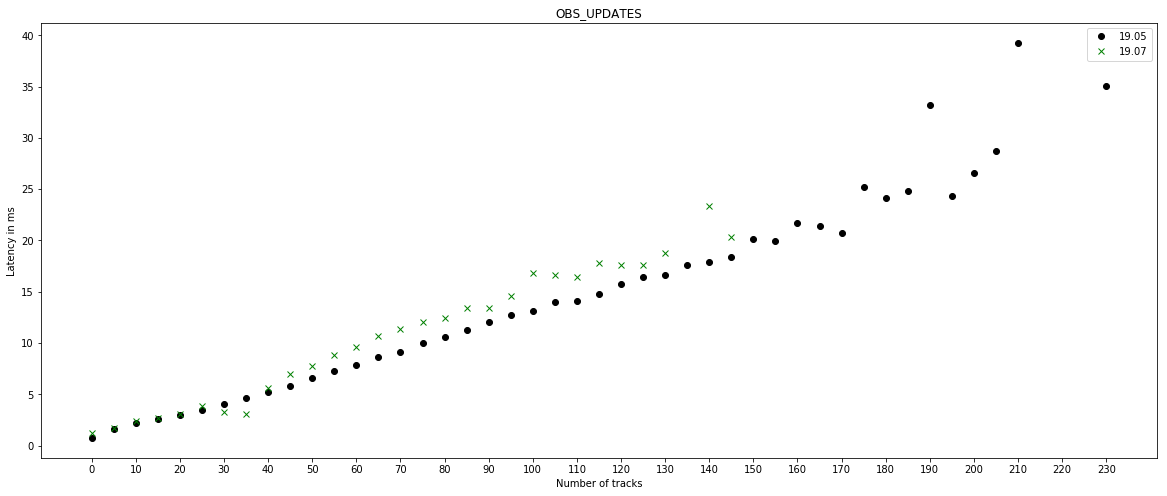

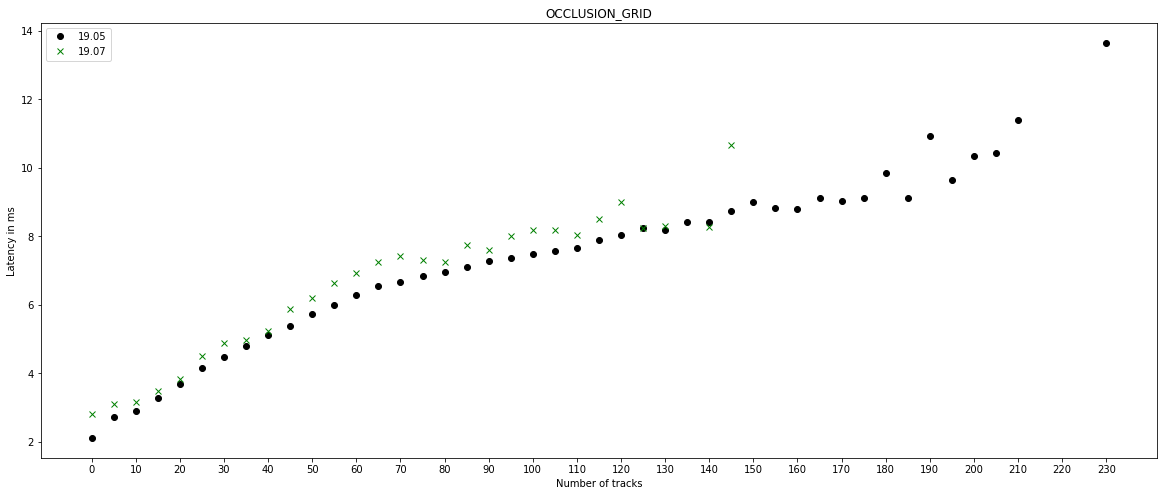

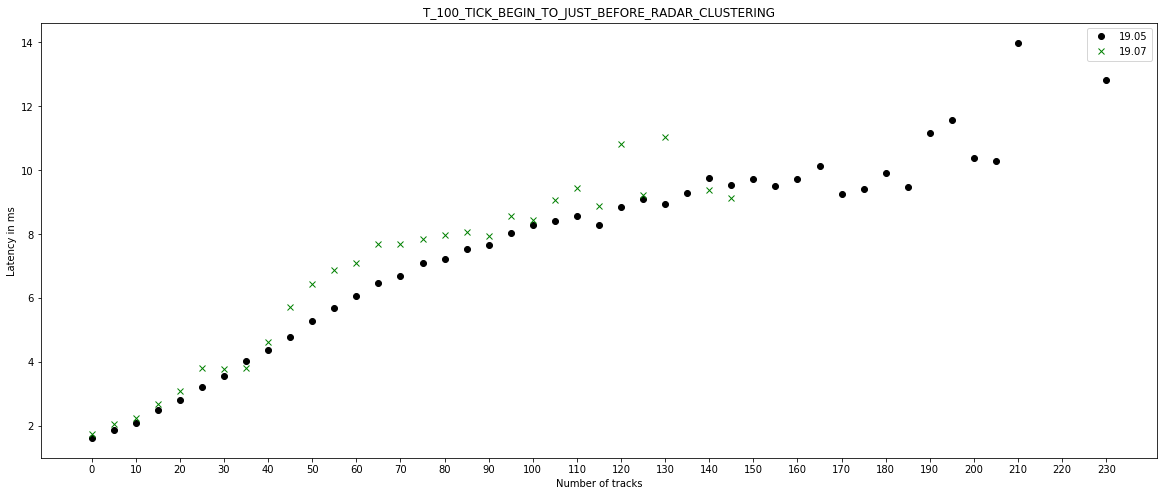

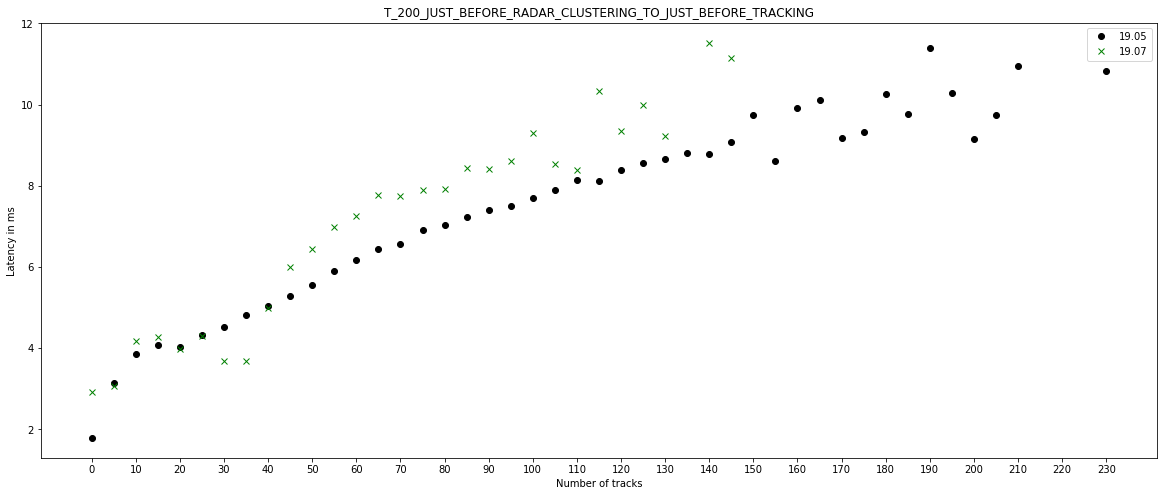

In [44]:
from collections import defaultdict
import numpy as np

def parse_latency_distribution_for_module(fname,
                                          module_name,
                                          tracks_to_latencies):
    TRACK_SPACING = 5
    for line in open(fname, 'r'):
        fields = line.strip().split(',')
        if fields[0] == module_name:
            tracks = (int(fields[1]) // TRACK_SPACING) * TRACK_SPACING
            latencies = [float(x) for x in fields[2:]]
            tracks_to_latencies[tracks].extend(latencies)
    return tracks_to_latencies
            
def get_latency_distribution_release(release, module_name):
    directory = os.path.join('/mnt/sun-pcp01/subhasis/timing_analysis/', release)
    paths = get_latency_distribution_paths(directory)
    tracks_to_latencies = defaultdict(list)
    for path in paths:
        parse_latency_distribution_for_module(path,
                                              module_name,
                                              tracks_to_latencies)
    tracks_to_summary = defaultdict(list)
    for k,v in tracks_to_latencies.items():
        tracks_to_summary[k] = v
    return tracks_to_summary
        
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]
def plot_latency_summaries(latencies, linestyle, label):
    median_latencies = [np.median(v) for v in latencies.values()]
    plt.plot(latencies.keys(), median_latencies, linestyle, label=label)

    
def compare_latencies(module_name):
    latencies_19_05 = get_latency_distribution_release('19.05', module_name)
    latencies_19_07 = get_latency_distribution_release('19.07', module_name)
    plot_latency_summaries(latencies_19_05, 'ko', '19.05')
    plot_latency_summaries(latencies_19_07, 'gx', '19.07')
    max_x = max(latencies_19_05.keys() + latencies_19_07.keys())
    plt.xticks(np.arange(0, max_x + 1, 10))
    plt.legend()
    plt.title(module_name)
    plt.ylabel('Latency in ms')
    plt.xlabel('Number of tracks')
    plt.show()

# Compare latencies for top level tracker timings
compare_latencies('TRACKER_ALGORITHM_UPDATE')
compare_latencies('TRACKER_ALGORITHM_FAST_UPDATE')
# Compare latencies for some modules to find which ones are slowing down the most
compare_latencies('TRACKING_UPDATE_END')
compare_latencies('OBS_UPDATES')
compare_latencies('OCCLUSION_GRID')
compare_latencies('T_100_TICK_BEGIN_TO_JUST_BEFORE_RADAR_CLUSTERING')
compare_latencies('T_200_JUST_BEFORE_RADAR_CLUSTERING_TO_JUST_BEFORE_TRACKING')